## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

**Цель исследования** 
1. Изучение рынка российского кинопроката и выявление текущих трендов.
2. Ответить на вопрос -  насколько фильмы, которые получили государственную поддержку интересны зрителю.

**Ход исследования**

Данные опубликованны на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Сохранение данных о прокатных удостоверениях в переменную mkrf_movies
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')

In [3]:
# Сохранение данных о прокате в кинотеатрах в переменную mkrf_shows
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
# Получение информации датафрейма с данными о прокатных удостоверениях
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
# Получение информации датафрейма с данными о прокате в кинотеатрах
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
# Замена выбивающегося значения в столбце с номером прокатного удостоверения на 0
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет', 'puNumber'] = 0

In [7]:
# Изменение типа данных столбца puNumber на Int64
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

In [8]:
# Объединение датафреймов mkrf_movies и mkrf_shows по солбцу puNumber методом merge и запись в новый датафрейм df
df = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

In [9]:
# Получение информации об объединенном датафрейме 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [10]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


<h3>Вывод:</h3>

1. Датафрейм содержит 7486 строк. <br>
2. В столбцах `director` , `producer`, `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `genres`, `box_office` есть пропуски в значниях.<br>
3. Названия столбцов не приведены к единому типу. Необходимо переименовать столбец `puNumber` на `pu_number`
4. Столбец `show_start_date` дата премьеры фильма имеет тип данных `object`, его необходимо заменить на тип данных `datetime`<br>
5. Столбец `ratings` дата премьеры фильма имеет тип данных `object`, его необходимо заменить на тип данных `float`<br>
6. После объединения двух датафреймов, была выполнена проверка правильности "склейки" все данные вошли в обединенный датафрейм. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
# Замена типа данных столбца show_start_date на datetime
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

В столбце `ratings` встречаются значения рейтинга в %. Необходимо привести все данные к единому виду.<br>
Рейтинг фильма будет измеряться от 0 до 10.

In [12]:
# Удаление знака % из значений
df['ratings'].replace(regex=True, inplace=True, to_replace=r'[^0-9.]', value=r'')

# Изменение типа данных столбца ratings на float
df['ratings'] = df['ratings'].astype('float')

# Приведение значений рейтинга к единому виду делением на 10, значений которые были в процентах
df.loc[df['ratings'] > 10 , 'ratings'] = df['ratings'] / 10

In [13]:
# Проверка замененных значений столбца ratings
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [14]:
# Переименование столбцаа puNumber
df.rename(columns = {'puNumber' : 'pu_number'}, inplace = True) 

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Заменим пропуски в столбцах film_studio, production_country, , , age_restriction и  на значение "unknown"

##### Режиссёр

In [15]:
# Получение количества пропусков значений в столбце Режиссёр
'Пропусков в значениях: {:.1%}'. format(df['director'].isna().value_counts()[1] / len(df))

'Пропусков в значениях: 0.1%'

In [16]:
# Заполнение пропусков столбца Режиссёр на заглушку "unknown"
df['director'] = df['director'].fillna('unknown')

###### Вывод:
Пропущенных значеинй всего 0.1% и сопаставить данные о режисере, возможно, только поиском данных в интеренете по названию фильма.<br>
Так как для цели исследования не важно кто является режиссером фильма, заполним данные заглушкой "unknown".

##### Продюсер

In [17]:
# Получение количества пропусов значений в столбце Продюсер
'Пропусков в значениях: {:.1%}'. format(df['producer'].isna().value_counts()[1] / len(df))

'Пропусков в значениях: 7.6%'

In [18]:
# Заполнение пропусков столбца Продюсер на заглушку "unknown"
df['producer'] = df['producer'].fillna('unknown')

###### Вывод:
Пропущенных значеинй 7.6% и сопаставить данные о продюсере, возможно, только поиском данных в интеренете по названию фильма.<br>
Так как для цели исследования не важно кто является продюсером фильма, заполним данные заглушкой "unknown".

##### Объём возвратных средств государственной поддержки

In [19]:
# Получение количества пропусков значений в столбце Объём возвратных средств государственной поддержки
'Пропусков в значениях: {:.1%}'. format(df['refundable_support'].isna().value_counts()[1] / len(df))

'Пропусков в значениях: 95.6%'

###### Вывод:
Пропущенных значеинй 95.6%.<br>
Если не указаны значения об объёме возвратных средств государственной поддержки, значит на этот фильм не выделялись средства государственной поддержки.<br>
Данные останутся без изменения, чтобы ие исказить результаты исследования.

##### Объём невозвратных средств государственной поддержки

In [20]:
# Получение количества пропусков значений в столбце Объём невозвратных средств государственной поддержки
'Пропусков в значениях: {:.1%}'. format(df['nonrefundable_support'].isna().value_counts()[1] / len(df))

'Пропусков в значениях: 95.6%'

###### Вывод:
Пропущенных значеинй 95.6%.<br>
Если не указаны значения об объёме невозвратных средств государственной поддержки, значит на этот фильм не выделялись средства государственной поддержки.<br>
Данные останутся без изменения, чтобы ие исказить результаты исследования.

##### Общий бюджет фильма

In [21]:
# Получение количества пропусков значений в столбце Общий бюджет фильма
'Пропусков в значениях: {:.1%}'. format(df['budget'].isna().value_counts()[1] / len(df))

'Пропусков в значениях: 95.6%'

###### Вывод:
Пропущенных значеинй 95.6%.<br>
Данных такое же количество, как и во всех столбцах, в которых хранятся данные связанные с гос. финансированием.<br>
Возможно заполнен бюджет только у фильмов с гос. финансированием
Данные будут оставлкенны без изменення.

##### Источник государственного финансирования

In [22]:
# Получение количества пропусков значений в столбце Источник государственного финансирования
'Пропусков в значениях: {:.1%}'. format(df['financing_source'].isna().value_counts()[1] / len(df))

'Пропусков в значениях: 95.6%'

###### Вывод:
Пропущенных значеинй 95.6%.<br>
Если не указаны значения об объёме невозвратных средств государственной поддержки, значит на этот фильм не выделялись средства государственной поддержки.<br>
Данные останутся без изменения, чтобы ие исказить результаты исследования.

##### Рейтинг фильма на КиноПоиске

In [23]:
# Получение количества пропусков значений в столбце Рейтинг фильма на КиноПоиске
'Пропусков в значениях: {:.1%}'. format(df['ratings'].isna().value_counts()[1] / len(df))

'Пропусков в значениях: 12.9%'

###### Вывод:
Пропущенных значеинй 12.9%.<br>
Если не указаны значения рейтинга фильма на КиноПоиске, т.к. рейтинг фильма будет ключевым показателем для исследования на сколько популярны фильмы с гос.финансированием, чтобы ие исказить результаты исследования, данные не будут изменены.

##### Жанр фильма

In [24]:
# Получение количества пропусков значений в столбце Жанр фильма
'Пропусков в значениях: {:.1%}'. format(df['genres'].isna().value_counts()[1] / len(df))

'Пропусков в значениях: 13.0%'

In [25]:
# Заполнение пропусков столбца Жанр фильма на заглушку "unknown"
df['genres'] = df['genres'].fillna('unknown')

###### Вывод:
Пропущенных значеинй 13% и сопаставить данные о жанре, возможно, только в ручную искать в интеренете по названию фильма.<br>
Заполним данные заглушкой "unknown".

##### Сборы в рублях

In [26]:
# Получение количества пропусков значений в столбце Сборы в рублях
'Пропусков в значениях: {:.1%}'. format(df['box_office'].isna().value_counts()[1] / len(df))

'Пропусков в значениях: 57.8%'

###### Вывод:
Пропущенных значеинй 57.8%.<br>
И сопаставить данные о сборах в рублях, возможно, только поиском данных в интеренете по названию фильма.<br>
Данные останутся без изменения, чтобы ие исказить результаты исследования.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [27]:
# Поиск дублирующихся строк
df.duplicated().sum()

0

In [28]:
# Проверка столбца pu_number на наличие дублей
df.pu_number.value_counts()

221054410    2
221154310    2
0            1
111008518    1
114002716    1
            ..
121021814    1
224028210    1
121013618    1
121017712    1
126002916    1
Name: pu_number, Length: 7484, dtype: int64

In [29]:
# Подробнее рассмотрим дублирующиеся данные
df.query('pu_number == 221054410 | pu_number == 221154310')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


В столбце `pu_number` есть два дублирующихся значения. Номер прокатного удостоверения 221054410 имеет разные названия, возможно произошла опечатка при заполнении. Так как эти данные нам не мешают оставим их без изменения.<br>
Вторая пара 221154310 с номером имеет одинаковое название, удалим один дубль в котором меньше данных в столбце страна-производитель.

In [30]:
# Удаление дубля
df.drop(labels = [5068],axis = 0, inplace = True)

In [31]:
# Подробнее рассмотрим дублирующиеся данные
df.query('pu_number == 221054410 | pu_number == 221154310')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN


In [32]:
# Проверка столбца title на наличие дублей
df.title.value_counts()

День святого Валентина_                                        5
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
Дитя тьмы                                                      4
Не брать живым /По книге Раджива Чандрасекарана/               4
Шерлок Холмс                                                   4
                                                              ..
Рецепт ее молодости                                            1
Салон красоты_                                                 1
Герой (2015)                                                   1
Добыча.                                                        1
100 лет Чувашской автономии                                    1
Name: title, Length: 6771, dtype: int64

In [33]:
df.query('title == "День святого Валентина_"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


В столбце `title` имеются дубликаты по названиям, но при этом имеют разные прокатные номера и даты выхода, возможно это даты выхода не только в кинотеатре, но и на разных стриминговых сервисах и телевидении.

###### Вывод:
В столбце `pu_number` есть два дублирующихся значения. Номер прокатного удостоверения 221054410 имеет разные названия, возможно произошла опечатка при заполнении. Так как эти данные нам не мешают оставим их без изменения.<br>
Вторая пара 221154310 с номером имеет одинаковое название, удалим один дубль в котором меньше данных в столбце страна-производитель.<br>
В столбце `title` имеются дубликаты по названиям, но при этом имеют разные прокатные номера и даты выхода, возможно это даты выхода не только в кинотеатре, но и на разных стриминговых сервисах и телевидении.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

##### Тип фильма

In [34]:
# Просмотр значений в столбце тип фильма 
df.type.value_counts()

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [35]:
# Удаление пробелов из названий типов фильмов
df.type = df.type.str.strip()

In [36]:
# Проверка удаления пробелов
df.type.value_counts()

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

###### Вывод:
В столбце с названиями типов фильмов были повторяющиеся значения с пробелами. Пробелы были удалены.

##### Страна-производитель

In [37]:
# Просмотр значений в столбце страна-производитель 
df.production_country.value_counts()

США                            2171
Россия                         1821
СССР                            347
Франция                         301
Великобритания                  257
                               ... 
США - Канада - КНР                1
Россия, Грузия, Испания           1
США - Пуэрто Рико                 1
Литва-Россия-Украина              1
Германия - Дания - Норвегия       1
Name: production_country, Length: 950, dtype: int64

In [38]:
# Удаление пробелов из названий стран-производителей
df.production_country = df.production_country.str.strip()

In [39]:
# Проверка удаления пробелов
df.production_country.value_counts()

США                                                          2174
Россия                                                       1821
СССР                                                          377
Франция                                                       302
Великобритания                                                259
                                                             ... 
СССР, Монголия                                                  1
Италия - Канада                                                 1
Армения - Казахстан                                             1
Испания - Бельгия - Франция - Португалия - Великобритания       1
Франция - Италия - Иран                                         1
Name: production_country, Length: 934, dtype: int64

###### Вывод:
В столбце с названиями стран-производителей фильмов были повторяющиеся значения с пробелами. Пробелы были удалены.

##### Режиссёр

In [40]:
# Просмотр значений в столбце режиссёр 
df.director.value_counts()

О.Семёнова             47
Д.Червяцов             17
Стивен Содерберг       17
Ридли Скотт            16
Тиль Швайгер           14
                       ..
Эрик Ван Лой            1
Л.Искандерова           1
Жеральд Юсташ-Матьё     1
А.Марутян               1
Илья Трусов             1
Name: director, Length: 4811, dtype: int64

In [41]:
# Удаление пробелов из имен режиссёров фильмов
df.director = df.director.str.strip()

In [42]:
# Проверка удаления пробелов
df.director.value_counts()

О.Семёнова          60
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
                    ..
Пабло Троперо        1
Л.Лысцов             1
Н.Кузнецова          1
Митчелл Алтери       1
Илья Трусов          1
Name: director, Length: 4801, dtype: int64

###### Вывод:
В столбце с именами режиссёров фильмов были повторяющиеся значения с пробелами. Пробелы были удалены.

##### Жанр фильма

In [43]:
# Просмотр значений в столбце жанр фильма 
df.genres.value_counts()

unknown                       976
драма                         476
комедия                       352
мелодрама,комедия             222
драма,мелодрама,комедия       189
                             ... 
биография,музыка,мюзикл         1
история,драма,мелодрама         1
спорт,драма,комедия             1
вестерн,приключения,боевик      1
комедия,военный,музыка          1
Name: genres, Length: 743, dtype: int64

In [44]:
# Удаление пробелов из названий жанров
df.genres = df.genres.str.strip()

In [45]:
# Проверка удаления пробелов
df.genres.value_counts()

unknown                       976
драма                         476
комедия                       352
мелодрама,комедия             222
драма,мелодрама,комедия       189
                             ... 
биография,музыка,мюзикл         1
история,драма,мелодрама         1
спорт,драма,комедия             1
вестерн,приключения,боевик      1
комедия,военный,музыка          1
Name: genres, Length: 743, dtype: int64

###### Вывод:
В столбце с именами режиссёров фильмов нет повторяющиеся значений с пробелами.

##### Cтудия-производитель

In [46]:
# Просмотр значений в столбце студия-производитель
df.film_studio.value_counts()

Киностудия "Мосфильм"                                                                                                                   341
ООО "Мульт в кино"                                                                                                                       57
Анимаккорд Лтд                                                                                                                           23
ООО "Мульт в кино"                                                                                                                       18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                                   16
                                                                                                                                       ... 
Буена Виста Интернэшнл, Тачстоун Пикчерз                                                                                                  1
Уорнер Бразерс, Парт

In [47]:
# Удаление пробелов из наименования студий-производителей
df.film_studio = df.film_studio.str.strip()

In [48]:
# Проверка удаления пробелов
df.film_studio.value_counts()

Киностудия "Мосфильм"                                                                                                                   345
ООО "Мульт в кино"                                                                                                                       75
Анимаккорд Лтд                                                                                                                           23
ООО "ТаББаК"                                                                                                                             18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                                   16
                                                                                                                                       ... 
Диджитал Интерференсе Продюксьон, Хадрон Филмс                                                                                            1
Кеннеди/Маршал Компа

###### Вывод:
В столбце с наименованиями студий производителей были повторяющиеся значения с пробелами. Пробелы были удалены.

##### Возрастная категория

In [49]:
# Просмотр значений в столбце возрастная категория
df.age_restriction.value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

###### Вывод:
В столбце с возрастными категориями фильмов нет повторяющиеся значений с пробелами.

##### Источник государственного финансирования

In [50]:
# Просмотр значений в столбце с источником государственного финансирования
df.financing_source.value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

###### Вывод:
В столбце с источником государственного финансирования фильмов нет повторяющиеся значений с пробелами.

##### Продюсер

In [51]:
# Просмотр значений в столбце именем продюсера
df.producer.value_counts()[:20]

unknown                                          568
П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             17
Кевин Фейги                                       11
Тони Майерс                                       11
А.Тельнов                                         11
Джерри Брукхаймер                                 11
ООО "Продюсерский центр ЕРАЛАШ"                   10
Н.Мокрицкая                                        9
С.Сельянов, А.Боярский                             9
Э.Пичугин                                          9
С.Говорухин, Е.Маскина                             9
Б.Машковцев, С.Струсовский                         8
ООО "Стар Медиа Дистрибьюшн"                       8
А.Герасимов                                        8
Г.Васильев, М.Мэннис, И.Попов                      8
Тиль Швайгер                                  

In [52]:
# Удаление пробелов из столбца с именем продюсера
df.producer = df.producer.str.strip()

In [53]:
# Проверка удаления пробелов
df.producer.value_counts()[:20]

unknown                                          568
П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             17
А.Тельнов                                         12
Кевин Фейги                                       11
Джерри Брукхаймер                                 11
Тони Майерс                                       11
ООО "Продюсерский центр ЕРАЛАШ"                   10
С.Говорухин, Е.Маскина                             9
Н.Мокрицкая                                        9
С.Сельянов, А.Боярский                             9
Э.Пичугин                                          9
ФГУП "Киноконцерн "Мосфильм"                       9
Фил Грабски                                        8
ООО "Стар Медиа Дистрибьюшн"                       8
А.Герасимов                                        8
Б.Машковцев, С.Струсовский                    

###### Вывод:
В столбце именем продюсера фильмов нет повторяющиеся значений с пробелами.

##### Вывод:
В столбцах `страна-производитель`, `режисёр`, `жанр фильма`, `студия производитель` и `продюсер` встречаются категории, которые идут через запятую и точно не категоризируют данные. <br>
В столбцах `тип фильма`, `возрастная категория` и `источник государственного финансирования` такой проблеммы нет, точно выделены категории.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

##### Бюджет

In [54]:
# Вывод данных в которых значение бюджета равно нулю, хотя на эти фильмы выделялись средства поддержки 
(
    df[~df['budget']
       .isna()]
    [['refundable_support', 'nonrefundable_support', 'budget']]
    .query('refundable_support + nonrefundable_support > budget')
)

,refundable_support,nonrefundable_support,budget
2053,0.0,23000000.0,0.0
2058,0.0,75000000.0,0.0
2472,10000000.0,70000000.0,0.0
2532,20000000.0,0.0,0.0
2615,60000000.0,100000000.0,0.0
2684,0.0,59000000.0,0.0
2788,0.0,35000000.0,0.0
2874,0.0,6000000.0,0.0
3047,19000000.0,51000000.0,0.0
3565,0.0,250000000.0,0.0


In [55]:
df.budget = np.where(df.budget == 0, np.nan, df.budget)

##### Объём возвратных средств государственной поддержки

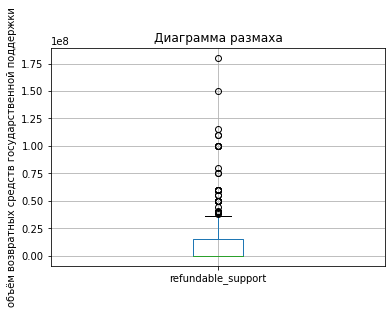

In [56]:
# Построене графика интерквартильного размаха
df.boxplot(column='refundable_support')
plt.title('Диаграмма размаха')
plt.ylabel('объём возвратных средств государственной поддержки')
None

In [57]:
# Значения объём возвратных средств государственной 
# поддержки выходящие за диапазон меньше 1% и больше 99%
# то есть менее 0.01 и более 0.99 перцентиля)

low_percentele = 0.01
hihg_percentele = 0.99

param_low = df['refundable_support'].quantile(low_percentele)
param_high = df['refundable_support'].quantile(hihg_percentele)

print(f'Нижняя граница: {param_low}')
print(f'Верхняя граница: {param_high}')

print(
    'Процент отброшенных значений составит = ',
    round(
        100 - len(df.query('@param_low <= refundable_support <= @param_high'))
        / len(df['refundable_support']) * 100,
        2
    ),
    '%'
)

Нижняя граница: 0.0
Верхняя граница: 110000000.0
Процент отброшенных значений составит =  95.6 %


##### Объём невозвратных средств государственной поддержки

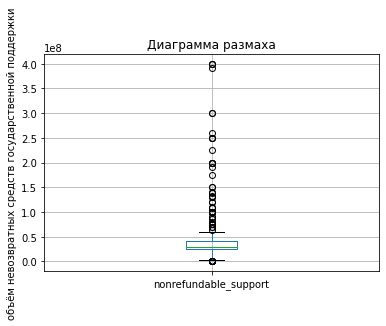

In [58]:
# Построене графика интерквартильного размаха
df.boxplot(column='nonrefundable_support')
plt.title('Диаграмма размаха')
plt.ylabel('объём невозвратных средств государственной поддержки')
None

In [59]:
# Значения объём невозвратных средств государственной поддержки 
# выходящие за диапазон меньше 1% и больше 99%
# то есть менее 0.01 и более 0.99 перцентиля)

low_percentele = 0.01
hihg_percentele = 0.99

param_low = df['nonrefundable_support'].quantile(low_percentele)
param_high = df['nonrefundable_support'].quantile(hihg_percentele)

print(f'Нижняя граница: {param_low}')
print(f'Верхняя граница: {param_high}')

print(
    'Процент отброшенных значений составит = ',
    round(
        100 - len(df.query('@param_low <= nonrefundable_support <= @param_high'))
        / len(df['nonrefundable_support']) * 100,
        2
    ),
    '%'
)

Нижняя граница: 0.0
Верхняя граница: 363552092.5799998
Процент отброшенных значений составит =  95.62 %


##### Общий бюджет фильма

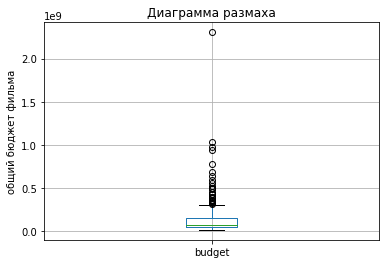

In [60]:
# Построене графика интерквартильного размаха
df.boxplot(column='budget')
plt.title('Диаграмма размаха')
plt.ylabel('общий бюджет фильма')
None

In [61]:
# Значения общего бюджета фильма
# выходящие за диапазон меньше 1% и больше 99%
# то есть менее 0.01 и более 0.99 перцентиля)

low_percentele = 0.01
hihg_percentele = 0.99

param_low = df['budget'].quantile(low_percentele)
param_high = df['budget'].quantile(hihg_percentele)

print(f'Нижняя граница: {param_low}')
print(f'Верхняя граница: {param_high}')

print(
    'Процент отброшенных значений составит = ',
    round(
        100 - len(df.query('@param_low <= budget <= @param_high'))
        / len(df['budget']) * 100,
        2
    ),
    '%'
)

Нижняя граница: 19867228.8
Верхняя граница: 921031875.1000023
Процент отброшенных значений составит =  95.9 %


##### Рейтинг фильма на КиноПоиске

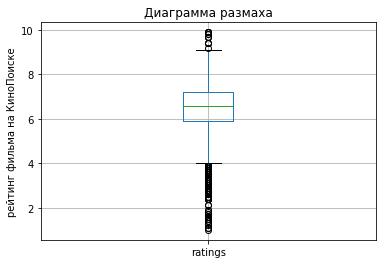

In [62]:
# Построене графика интерквартильного размаха
df.boxplot(column='ratings')
plt.title('Диаграмма размаха')
plt.ylabel('рейтинг фильма на КиноПоиске')
None

In [63]:
# Значения рейтинга фильма на КиноПоиске
# выходящие за диапазон меньше 1% и больше 99%
# то есть менее 0.01 и более 0.99 перцентиля)

low_percentele = 0.01
hihg_percentele = 0.99

param_low = df['ratings'].quantile(low_percentele)
param_high = df['ratings'].quantile(hihg_percentele)

print(f'Нижняя граница: {param_low}')
print(f'Верхняя граница: {param_high}')

print(
    'Процент отброшенных значений составит = ',
    round(
        100 - len(df.query('@param_low <= ratings <= @param_high'))
        / len(df['ratings']) * 100,
        2
    ),
    '%'
)

Нижняя граница: 3.1
Верхняя граница: 8.5
Процент отброшенных значений составит =  14.6 %


##### Сборы в рублях

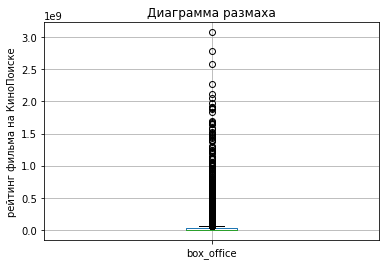

In [64]:
# Построене графика интерквартильного размаха
df.boxplot(column='box_office')
plt.title('Диаграмма размаха')
plt.ylabel('рейтинг фильма на КиноПоиске')
None

In [65]:
# Значения рейтинга фильма на КиноПоиске
# выходящие за диапазон меньше 1% и больше 99%
# то есть менее 0.01 и более 0.99 перцентиля

low_percentele = 0.01
hihg_percentele = 0.99

param_low = df['box_office'].quantile(low_percentele)
param_high = df['box_office'].quantile(hihg_percentele)

print(f'Нижняя граница: {param_low}')
print(f'Верхняя граница: {param_high}')

print(
    'Процент отброшенных значений составит = ',
    round(
        100 - len(df.query('@param_low <= box_office <= @param_high'))
        / len(df['box_office']) * 100,
        2
    ),
    '%'
)

Нижняя граница: 100.0
Верхняя граница: 1282478576.8811984
Процент отброшенных значений составит =  58.61 %


###### Вывод: 
В данных обнаружена аномалия. Есть фильмы на которые выделялись средства государственной поддержки, а их бюджет равен 0.
Такого быть не может, поэтому заполним данные бюджета в таких фильмах пропусками, чтобы эти данные не повлияли на результаты исследования.
Были построены графики итерквартильного размаха, и посчитан процент потерь данных если бы были отброшены данные менее 0.01 и более 0.99 перцентиля. т.к. большой получается большой процент потерь, данные оставлены без изменения.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [66]:
# Создание столбца с годом проката
df['year'] = df['show_start_date'].dt.year

In [67]:
# Проверка созданного столбца
df.year

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7481    2019
7482    2019
7483    2019
7484    2019
7485    2019
Name: year, Length: 7485, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [68]:
def splt(value):
    value = value.split(',')
    return value[0]

In [69]:
# Создание столбцов с главным режиссёром и главным жанром фильма
df['main_director'] = df['director'].apply(lambda x: x.split(',')[0])
df['main_genre'] = df['genres'].apply(lambda x: x.split(',')[0])

In [70]:
# Проверка созданных столбцов
df[['main_director', 'main_genre']]

,main_director,main_genre
0,Кевин Костнер,боевик
1,Е.Матвеев,драма
2,Тимур Бекмамбетов,фантастика
3,Тимур Бекмамбетов,фантастика
4,Тимур Бекмамбетов,фантастика
...,...,...
7481,Фил Грабски,unknown
7482,Ник Пауэлл,боевик
7483,Чарльз Е.Бастьен,unknown
7484,А.Беляев,unknown


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [71]:
# Создание столбца с долей государственной поддержки от общего бюджета фильма
df['part'] = (df.refundable_support + df.nonrefundable_support) / df.budget

In [72]:
# Проверка созданного столбца
df[~df['part'].isna()]['part']

1281    0.333703
1448    0.700000
1498    0.612691
1524    0.690095
1792    0.624764
          ...   
7464    0.510204
7466    0.526316
7474    0.529661
7476    0.649998
7478    0.666012
Name: part, Length: 315, dtype: float64

### Шаг 3. Проведите исследовательский анализ данных


#### Количества фильмов выходивших в прокат каждый год

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

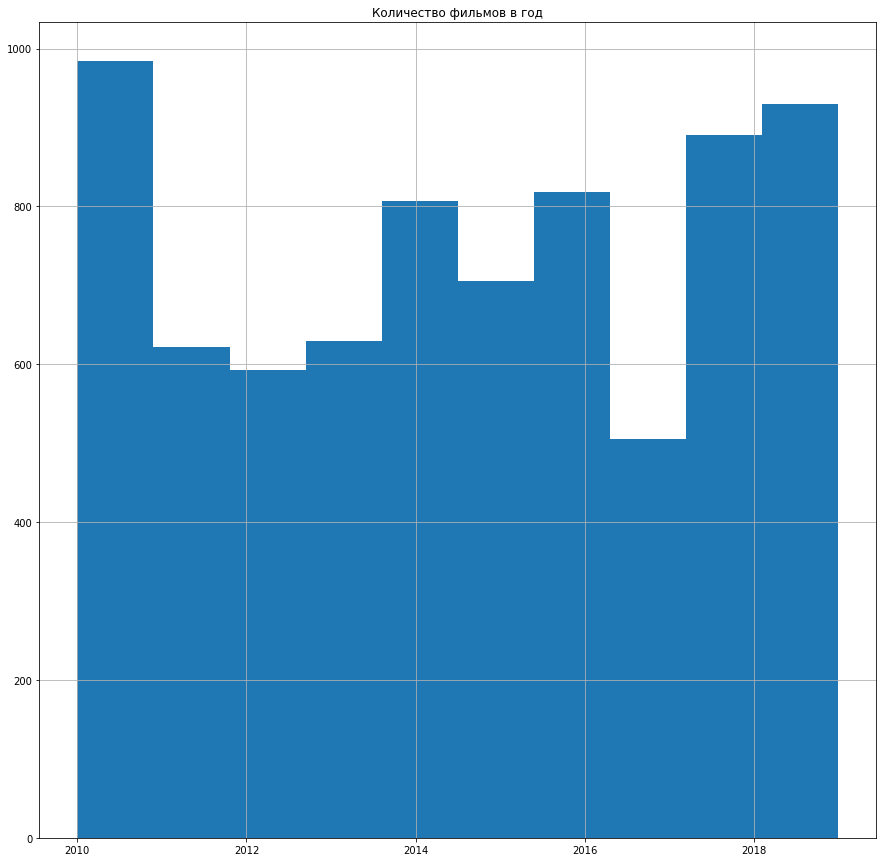

In [73]:
# Построение гистограммы с количеством фильмов по годам
df.year.hist(figsize=(15,15))
plt.title('Количество фильмов в год')
None

Вывод:
В 2017 году было снято меньше всего фильмов.

In [74]:
# Расчет какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
'Доля фильмов с указанной информацией о прокате в кинотеатрах составляют: {:.1%}'. format(df.box_office.isna().value_counts()[0] / len(df))

'Доля фильмов с указанной информацией о прокате в кинотеатрах составляют: 42.2%'

In [75]:
# Создание дататфрейма с количеством прокатных фильмов и общим количеством фильмов
df_year = df.groupby('year').agg({'box_office':'count','title':'count'})

In [76]:
# Создание в датафрейме столбца с долей прокатных фильмов
df_year['part'] = df_year.box_office / df_year.title

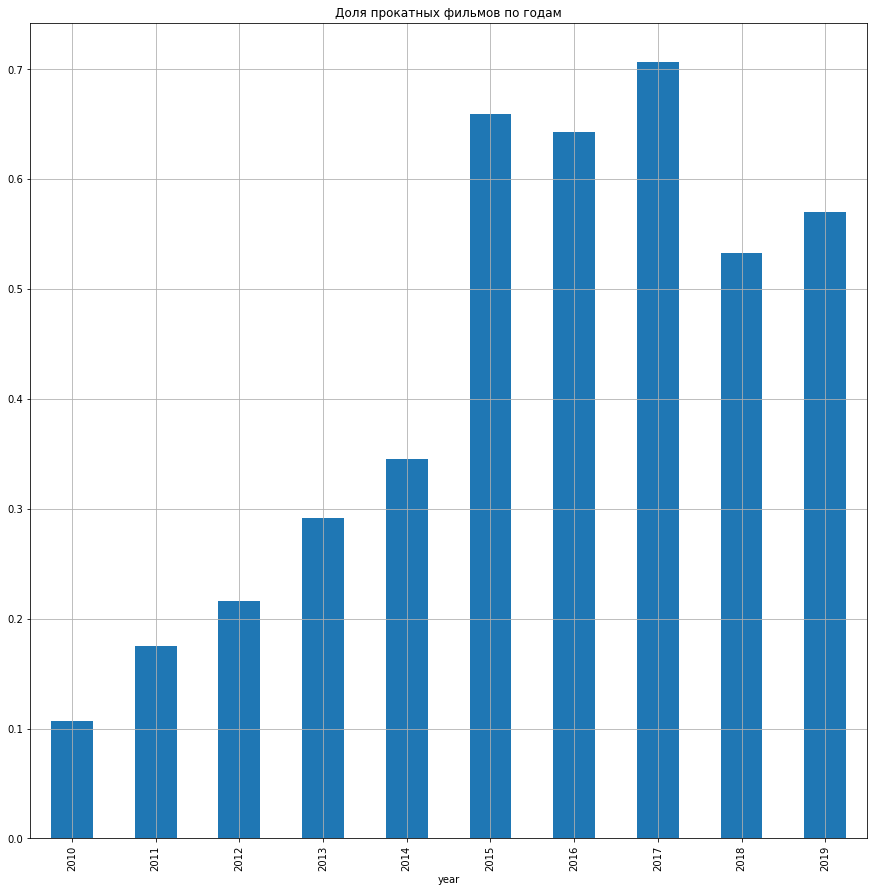

In [77]:
# Построение графика доли прокатных фильмов по годам
df_year.part.plot(kind='bar', grid=True, figsize=(15,15))
plt.title('Доля прокатных фильмов по годам')
None

##### Вывод:
Доля фильмов с указанной информацией о прокате в кинотеатрах составляют: 42.2%. Возможно остальные фильмы выходили стриминговых площадках. <br>
Доля прокатных фильмов плавно росла до 2014 года, в 2015 году выросла практически в 2 раза по сравнению с 2014 годом. Затем также плавно росла до 2017 года. В 2018 произошел небольшой спад, но уже в 2019 продолжился рост.


#### Динамика фильмов по годам

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

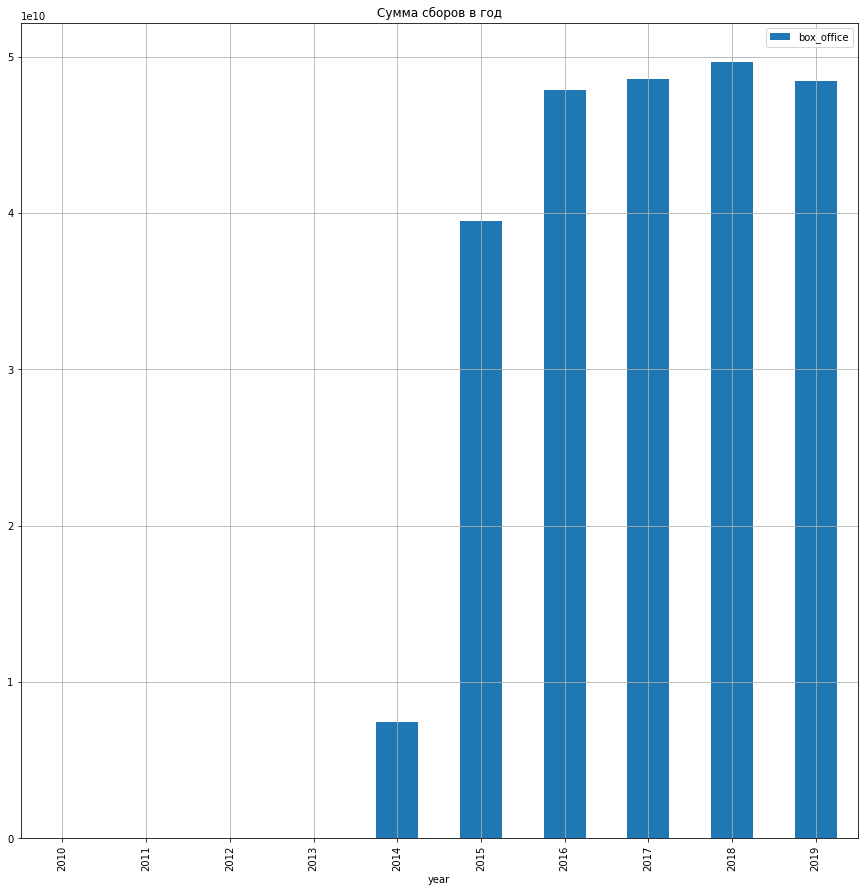

In [78]:
# Построение графика суммы годовых сборов
(
    df.groupby(
        'year'
    ).agg(
        {'box_office':'sum'}
    ).plot(
        kind='bar', 
        grid=True, 
        figsize=(15,15))
)

plt.title('Cумма сборов в год')
None

In [79]:
(
    df.groupby(
        'year'
    ).agg(
        {'box_office':'sum'}
    )
)

,box_office
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


##### Вывод:
1. До 2014 года нет данных о кассовых сборах в кинотеатрах, в 2014 году тоже маленькое значение относительно полследующих лет. Возможны 2 варианта:
    1. В 2015 году произощел резкий рост сборов.
    2. Есть ошибка в данных выгруженных до 2014 года.

2. Начиная с 2015 года наблюдается плавных рост сборов.

#### Среднее и медиана суммы сборов по годам

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [80]:
# Сводная таблица с медианной и средней суммой для каждого года
(
    df.pivot_table(
        index='year', 
        values='box_office', 
        aggfunc=['mean', 'median']
    ).droplevel(
        level=1, 
        axis=1
    )
)

,mean,median
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000
2018,1.045651e+08,8891102.210


##### Вывод:
Средняя и медианная сумма с 2010 по 2013 год отличается на 2-3 порядка от сумм с 2014 по 2019 годы. <br>
Большая разница между средним и медианным значением может быть связана с тем что, есть фильмы, которые получили огромные сборы и били все рекорды, это могло повлиять на высокое среднее.

#### Возрастное ограничение аудитории

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

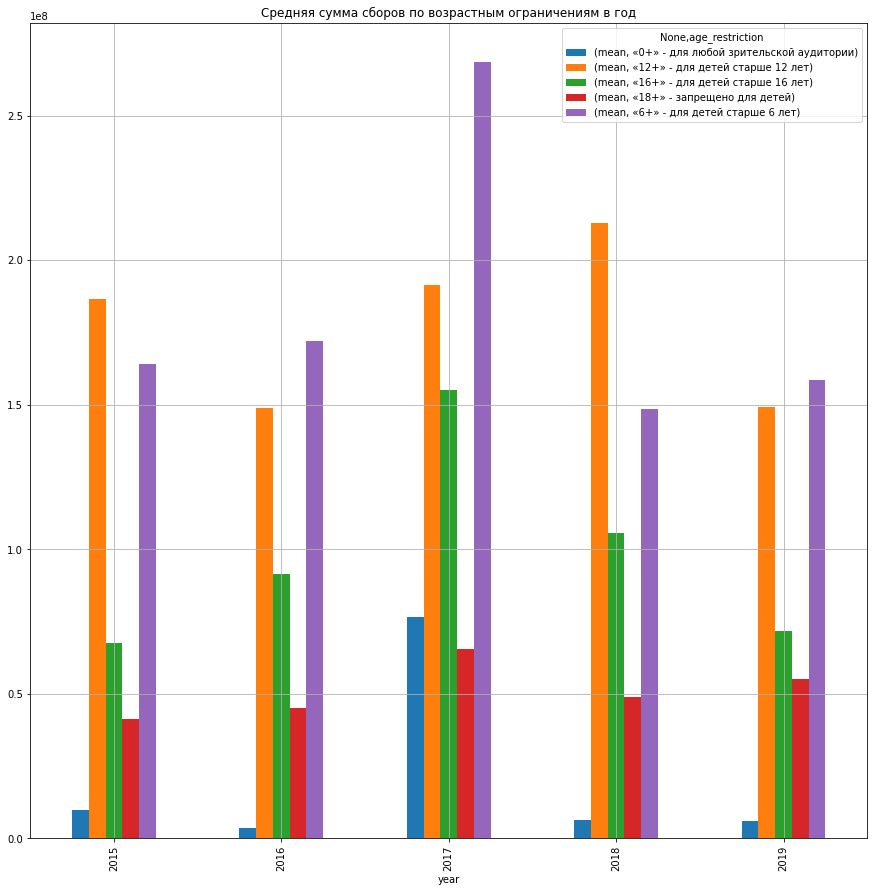

In [81]:
# Создание свдной таблицы с 2015 по 2019 годы по среднему значению сборов для возрастных групп
# И простроение гистограммы по данным сводной таблицы
(
    df.query(
        '2015 <= year <= 2019'
    ).pivot_table(
        index=['year'], 
    columns='age_restriction', 
        values='box_office', 
        aggfunc=['mean']
    ).plot(
        kind='bar', 
        grid=True, 
        figsize=(15,15))
)
plt.title('Cредняя сумма сборов по возрастным ограничениям в год')
None

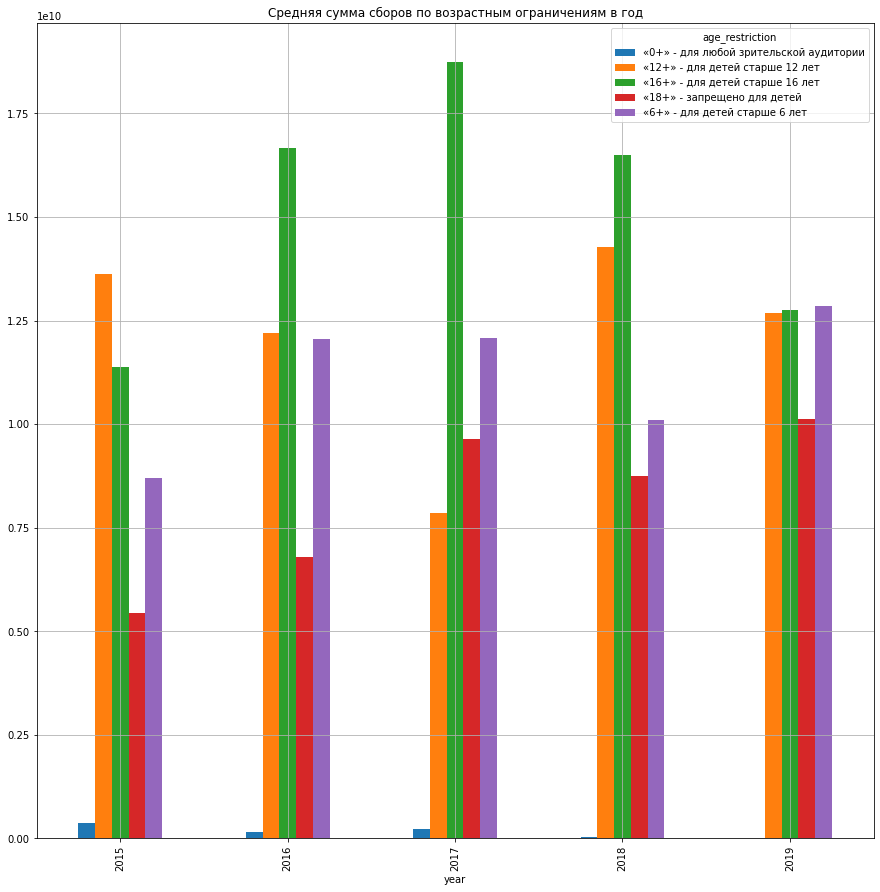

In [82]:
# Создание свдной таблицы с 2015 по 2019 годы по среднему значению сборов для возрастных групп
# И простроение гистограммы по данным сводной таблицы
(
    df.query(
        '2015 <= year <= 2019'
    ).pivot_table(
        index=['year'], 
    columns='age_restriction', 
        values='box_office', 
        aggfunc='sum'
    ).plot(
        kind='bar', 
        grid=True, 
        figsize=(15,15))
)
plt.title('Cредняя сумма сборов по возрастным ограничениям в год')
None

##### Вывод:
В 2017 году доля прокатынх фильмов была самой большой, а фильмы с возрастным ограничением «6+» заработали больше денег чем обычно.<br>
В среднем больше всего сборов в прокате получают фильмы с возрастным ограничением «6+» и «12+».<br>
Наибольшие суммарные сборы с 2016 по 2018 в категории "16+", а в 2019 снизились и стали одинаковыми с категориями "6+" и "12+".

#### Самый популярный жанр и режиссёр

In [83]:
# Вывод топ-5 самых популярных жанров со срелней оценкой рейтинга выше 6.5
(
    df.pivot_table(
        index='main_genre', 
        values='ratings', 
        aggfunc=['count','mean']
    ).droplevel(
        level=1, 
        axis=1
    ).query(
        'mean > 6.5'
    ).sort_values(
        'count', 
        ascending=False
    ).head()
)

,count,mean
main_genre,,
драма,1688,6.767239
боевик,617,6.508914
триллер,521,6.589635
фантастика,410,6.643171
мелодрама,383,6.522977


In [84]:
# Вывод топ-5 самых популярных режиссера со срелней оценкой рейтинга выше 7.8
(
    df.pivot_table(
        index='main_director', 
        values='ratings', 
        aggfunc=['mean', 'count']
    ).droplevel(
        level=1, 
        axis=1
    ).query(
        'mean > 7.8'
    ).sort_values(
        'count', 
        ascending=False
    ).head()
)

,mean,count
main_director,,
Питер Джексон,8.069231,13
Дэвид Финчер,7.908333,12
Гай Ричи,7.909091,11
Кристофер Нолан,8.327273,11
Мартин Скорсезе,7.837500,8


##### Вывод:
Самые популярные жанры:
1. драма
2. боевик
3. триллер
4. фантастика
5. мелодрама <br>

Самые популярные режиссёры
1. Питер Джексон
2. Дэвид Финчер
3. Гай Ричи
4. Кристофер Нолан	
5. Мартин Скорсезе	

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

#### Сумма государственного финансирования 

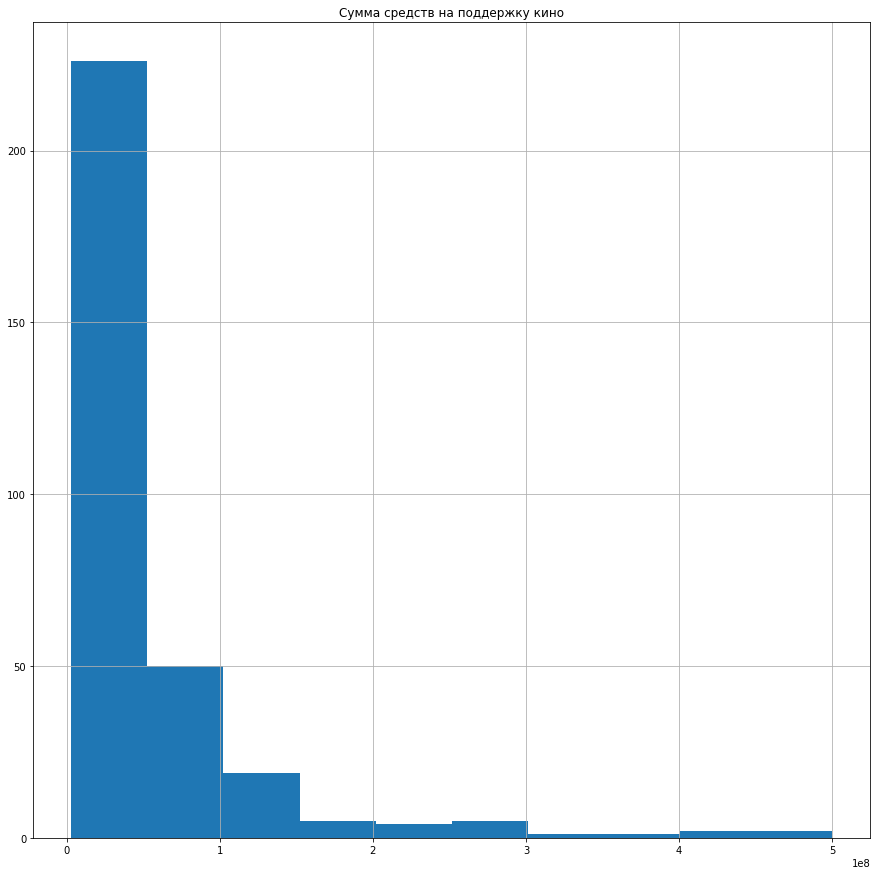

In [85]:
# Построение гистограммы общих средств выделяемых на финанасирование 
(
    df[~df['budget'].isna()]['refundable_support'] + 
    df[~df['budget'].isna()]['nonrefundable_support']
).hist(
    bins=10,
    figsize=(15,15)
)

plt.title('Cумма средств на поддержку кино')
None

In [86]:
# Добавим столбец в который добавим общий бюджет
df['all_support'] = df['refundable_support'] + df['nonrefundable_support']

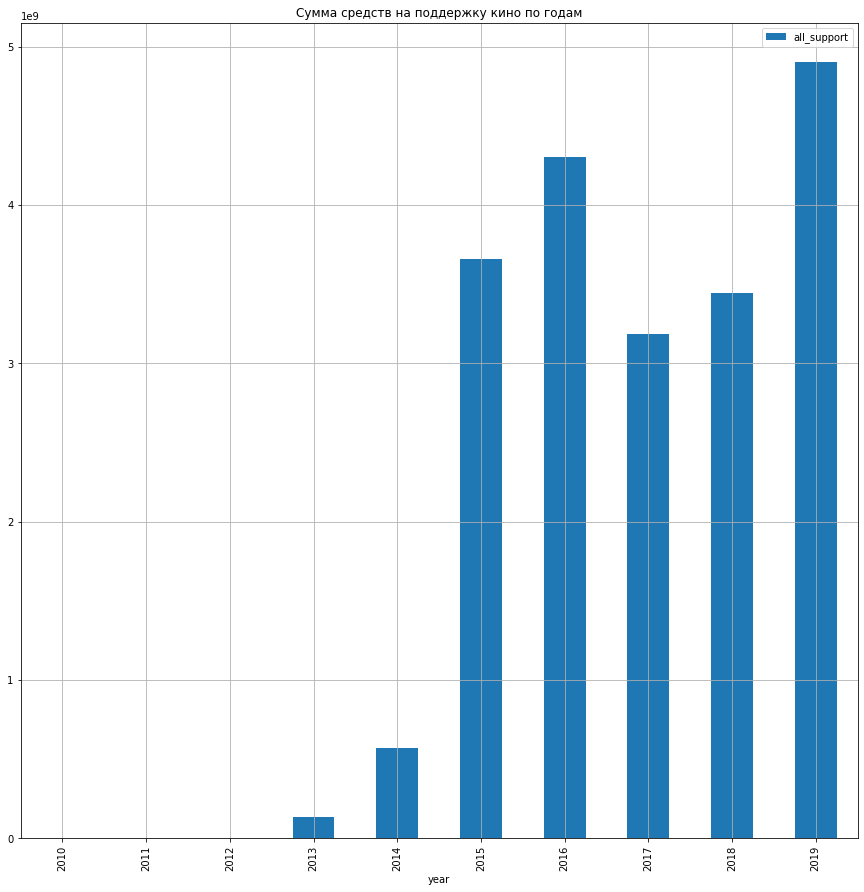

In [87]:
# Построение графика суммы выделяемых средств на поддержку кино по годам
(
    df.groupby(
        'year'
    ).agg
    ({'all_support':'sum'})
    .plot
    (kind='bar',
     grid=True,
    figsize=(15,15))
)

plt.title('Сумма средств на поддержку кино по годам')
None

##### Вывод:
Большаяя часть выделяемых средств государственной поддержки составляет менее 10 миллионов рублей.<br>
До 2014 года средства на поддержку кино практически не выделялись. В 2015 произошол резкий скачок.<br>
С 2015 года до 2018 года сумма средств на поддержку кино плавно уменшалась, а в 2019 году выросла в почти два раза по отношению к 2018 году.

#### Окупаемость фильмов с государственной поддержкой

In [88]:
# Создание столбца окупаемость фильмов с государственной поддержкой в датафрейме
df['payback'] = df['box_office'] - df['budget']

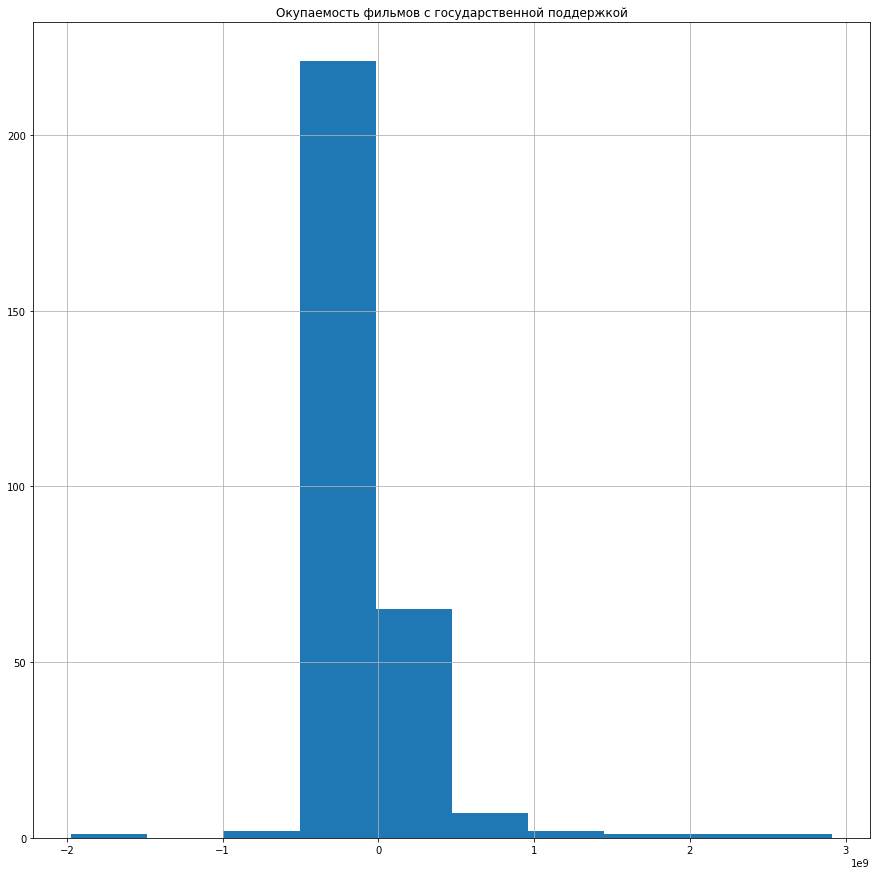

In [89]:
# Гистограмма окупаемости фиьлмов с гос. поддержкой
df.payback.hist(figsize=(15,15))
plt.title('Окупаемость фильмов с государственной поддержкой')
None

In [90]:
# Расчет какую долю составляют неокупившихся фильмы с государственной поддержкой 
'Доля неокупившихся фильмов с государственной поддержкой составляет: {:.1%}'. format(
    (sum(df[~df['payback'].isna()].payback < 0) /  len(df[~df['payback'].isna()].payback)))

'Доля неокупившихся фильмов с государственной поддержкой составляет: 78.1%'

##### Вывод:
Большая чать фильмов на которые выдялялась государственная поддержка не окупились. <br>
Доля неокупившихся фильмов с государственной поддержкой составляет: 74%

####  Рейтинг фильмов с государственной поддержкой

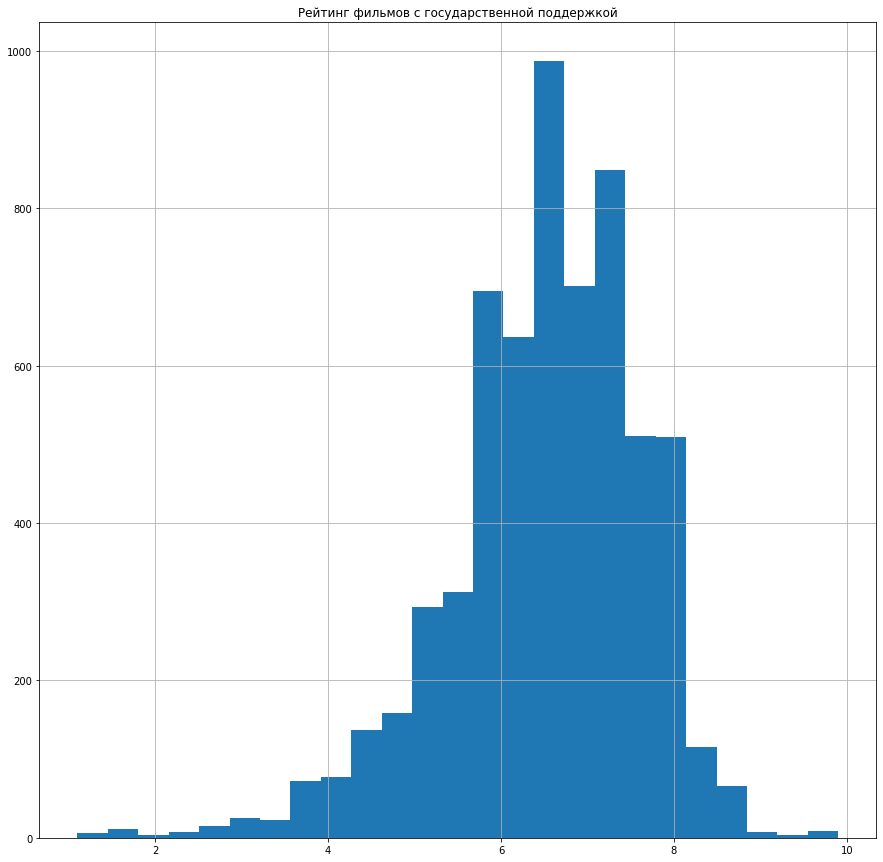

In [91]:
# Построение гистограммы рейтинка фильмов с государственной поддержкой
df[df.payback.isna()].ratings.hist(bins=25, figsize=(15,15))
plt.title('Рейтинг фильмов с государственной поддержкой')
None

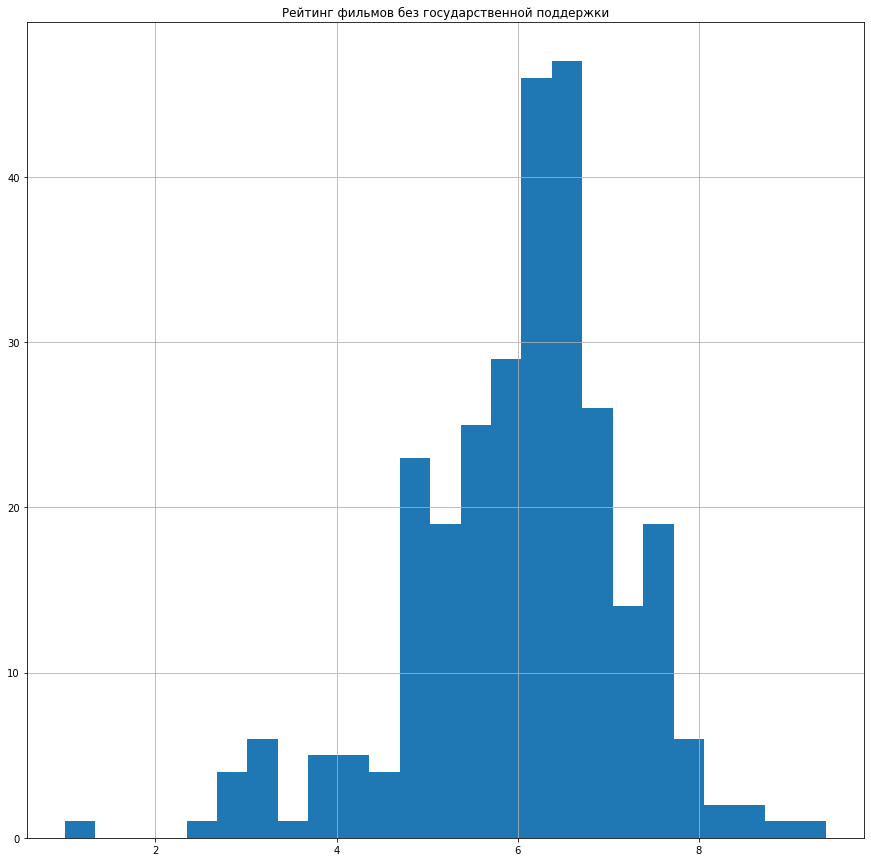

In [92]:
# Построение гистограммы рейтинка фильмов с без государственной поддержки
df[~df.payback.isna()].ratings.hist(bins=25, figsize=(15,15))
plt.title('Рейтинг фильмов без государственной поддержки')
None

In [93]:
# Создание датафрейма показывающего среднее и медианное значение для фильма с гос. поддержкой и без нее
rating_df = pd.DataFrame(
    [
        df[df.payback.isna()
          ].ratings
        .agg(
            ['mean', 
             'median']
        ),
        df[~df.payback.isna()
          ].ratings
        .agg(
            ['mean', 
             'median']
        )
    ]
).T

rating_df.columns = ['без поддержки', 'с поддержкой']
rating_df

,без поддержки,с поддержкой
mean,6.508907,6.036934
median,6.600000,6.200000


##### Вывод:
Средняя оценка рейтинга фильмов с государственной поддержкой варьируется от 5 до 7.
Среднее и медианное значение рейтинка у фильмов с государственным финансированием на 0.5 балла ниже чем у фильмов без поддержки от государства.

### Шаг 5. Напишите общий вывод

Целью исследавания было:
1. Изучить рынкок российского кинопроката и выявить текущие тренды.
2. Изучить насколько фильмы, которые получили государственную поддержку интересны зрителю.

Исследование было проведено в три этапа:
1. Обзор данных:
    1. При первоначальном рассмотрении данных было обнаружено большое количество пропусков. 
    2. Не все названия столбцов приведены к единому виду.
    3. Есть столбцы с неправильным типом данных.


2. Предобработка данных:
    1. Данные в столбцах `Режиссёр`, `Продюсер`, `Жанр фильма` были зополнены знначениями `unknown`, оставниеся столбцы с пропусками были оставлены без изменения, чтобы не искажать результаты исследования.
    2. Данные были проверены на наличие дубликатов.
    3. Были изучены категориальные значения и в столбцах `Тип фильма`, `Страна-производитель` и `Режиссер` были обнаружены данные у которых появился пробел в начале строки. Данные были приведены к единому виду.
    4. Были изучены количественные значения и была обнаруженна аномалия в значениях столбца `Общий бюджет фильма`. Фильмы на которые выделялось государственное финансирование имели бюджет равный 0. Чтобы эти данные не повлияли на результаты исследования они были заменены на пропуски.
    5. К данным были добавлены столбцы с:
        1. информацией о годе проката;
        2. именем и фамилией главного режиссёра;
        3. основным жанром фильма.
        
        
3. Исследовательский анализ данных:
    1. Всех фильмов:
        1. Доля фильмов с указанной информацией о прокате в кинотеатрах составляют: 42.2%. <br> Возможно остальные фильмы выходили стриминговых площадках. <br> Доля прокатных фильмов плавно росла до 2014 года, в 2015 году выросла практически в 2 раза по сравнению с 2014 годом.<br> Затем также плавно росла до 2017 года. В 2018 произошел небольшой спад, но уже в 2019 продолжился рост.
        2. Начиная с 2015 года наблюдается плавных рост сборов. <br> До 2014 года нет данных о кассовых сборах в кинотеатрах, в 2014 году тоже маленькое значение относительно полследующих лет. Возможны 2 варианта:
            1. В 2015 году произощел резкий рост сборов.
            2. Есть ошибка в данных выгруженных до 2014 года.
        3. Средняя и медианная сумма соборов с 2010 по 2013 год отличается на 2-3 порядка от суммы сборов с 2014 по 2019 годы.
        4. В 2017 году доля прокатынх фильмов была самой большой, а фильмы с возрастным ограничением «6+» заработали больше денег чем обычно.<br>В среднем больше всего сборов в прокате получают фильмы с возрастным ограничением «6+» и «12+». <br>     
    2. Фильмов получивших государственную поддержку:
        1. Большаяя часть выделяемых средств государственной поддержки составляет менее 10 миллионов рублей.
        2. До 2014 года средства на поддержку кино практически не выделялись. В 2015 произошол резкий скачок.
        3. С 2015 года до 2018 года сумма средств на поддержку кино плавно уменшалась, а в 2019 году выросла в почти два раза по отношению к 2018 году.
        4. Большая чать фильмов на которые выдялялась государственная поддержка не окупились. <br>Доля неокупившихся фильмов с государственной поддержкой составляет: 74%
        5. Средняя оценка рейтинга фильмов с государственной поддержкой варьируется от 5 до 7.
        6. Среднее и медианное значение рейтинка у фильмов с государственным финансированием на 0.5 балла ниже чем у фильмов без поддержки от государства.
    
Отвечая на вопросы цели исследования:
1. Текущий тренд - рост общего количества фильмов для российского зрителя. Самые популярные фильмы для возрастных категориий "6+" и "12+". Можно предположить, что это мультфильмы. которые смотрят всей семьей.<br> 
    1. Самые популярные жанры:
        1. драма
        2. боевик
        3. триллер
        4. фантастика
        5. мелодрама <br>
    2. Самые популярные режиссёры:
        1. Питер Джексон
        2. Дэвид Финчер
        3. Гай Ричи
        4. Кристофер Нолан	
        5. Мартин Скорсезе	 
2. Фильмы получающие государственную поддержку в `74%` убыточные. И менее популярны, чем фильны не получающие поддержку.